In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%reload_ext lab_black

In [2]:
epoch_key = "bon", 3, 2

In [3]:
from src.standard_decoder import load_data

(
    linear_position,
    multiunit_dfs,
    position_info,
    ripple_times,
    track_graph,
    center_well_id,
) = load_data(epoch_key)

Failed to load file: /Users/edeno/Documents/GitHub/replay_trajectory_paper/src/../Raw-Data/Bond/bonDIO03.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /Users/edeno/Documents/GitHub/replay_trajectory_paper/src/../Raw-Data/Bond/bonDIO03.mat
No DIO file found, inferring correct inbound/outbound from task rules
Failed to load file: /Users/edeno/Documents/GitHub/replay_trajectory_paper/src/../Raw-Data/Bond/bonDIO03.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /Users/edeno/Documents/GitHub/replay_trajectory_paper/src/../Raw-Data/Bond/bonDIO03.mat
No DIO file found, inferring correct inbound/outbound from task rules


In [4]:
from src.standard_decoder import fit_mark_likelihood

(
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    place_bin_centers,
    place_bin_edges,
    edges,
) = fit_mark_likelihood(linear_position, multiunit_dfs, track_graph, center_well_id)

In [5]:
import xarray as xr

data_type, dim = "clusterless", "1D"

results = xr.open_dataset(
    "../Processed-Data/bon_03_02.nc", group=f"/{data_type}/{dim}/classifier/ripples/"
)

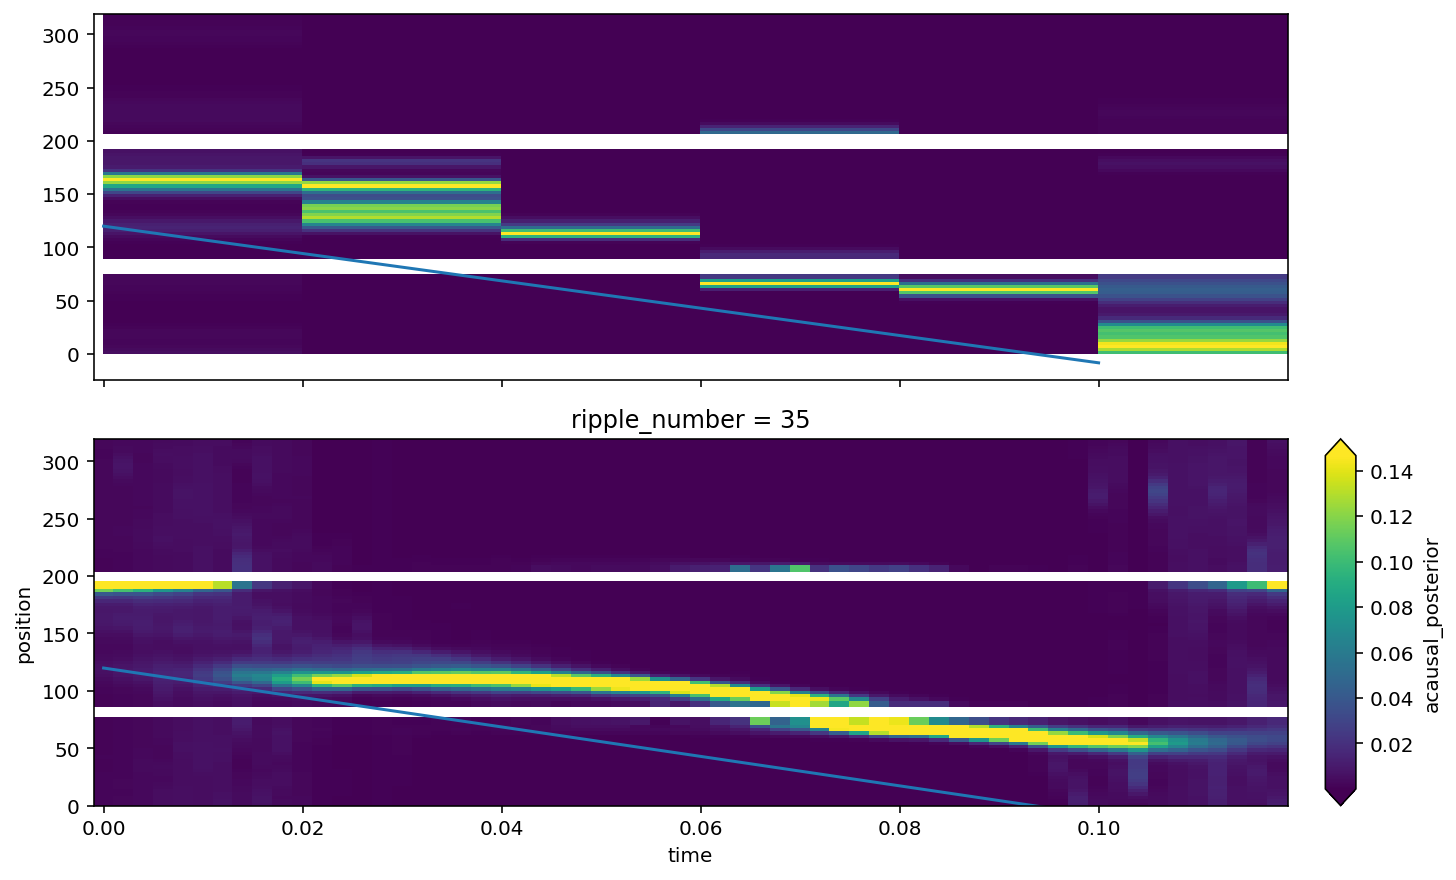

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from src.standard_decoder import detect_line_with_radon, predict_mark_likelihood

ripple_number = 35

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

dp = np.mean(np.diff(place_bin_edges.squeeze())[is_track_interior])
estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, dt=0.020, dp=dp
)

t = np.append(time, time[-1] + 0.020)
x, y = np.meshgrid(t, place_bin_edges)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
likelihood[:, ~is_track_interior] = np.nan
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state", skipna=False).plot(
    x="time", y="position", robust=True, ax=axes[1]
)
axes[1].plot(time, estimated_position)

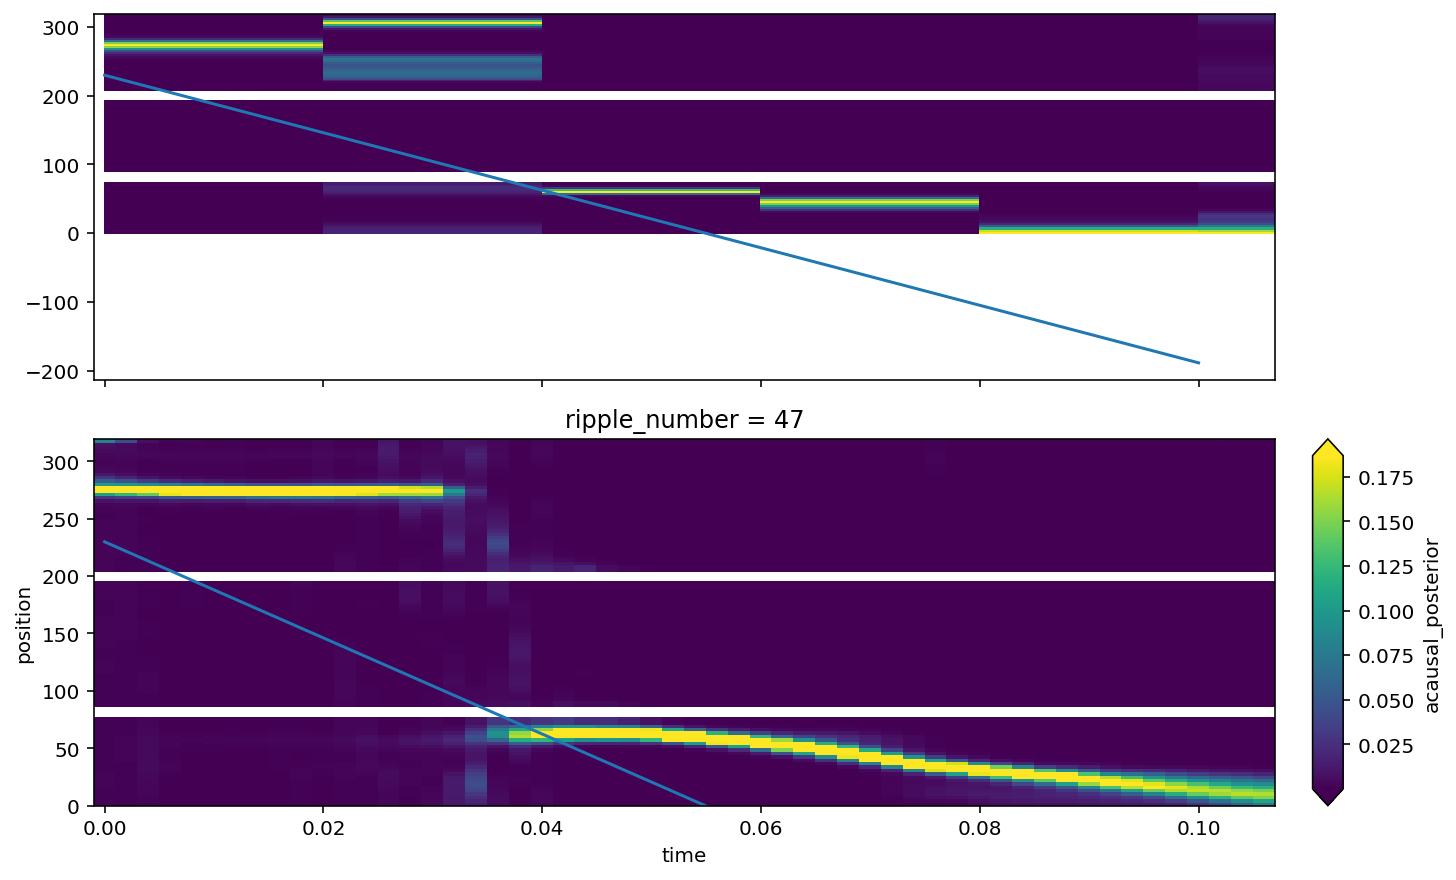

In [53]:
ripple_number = 47

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

dp = np.mean(np.diff(place_bin_edges.squeeze())[is_track_interior])
estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, dt=0.020, dp=dp
)

t = np.append(time, time[-1] + 0.020)
x, y = np.meshgrid(t, place_bin_edges)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
likelihood[:, ~is_track_interior] = np.nan
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state", skipna=False).plot(
    x="time", y="position", robust=True, ax=axes[1]
)
axes[1].plot(time, estimated_position)

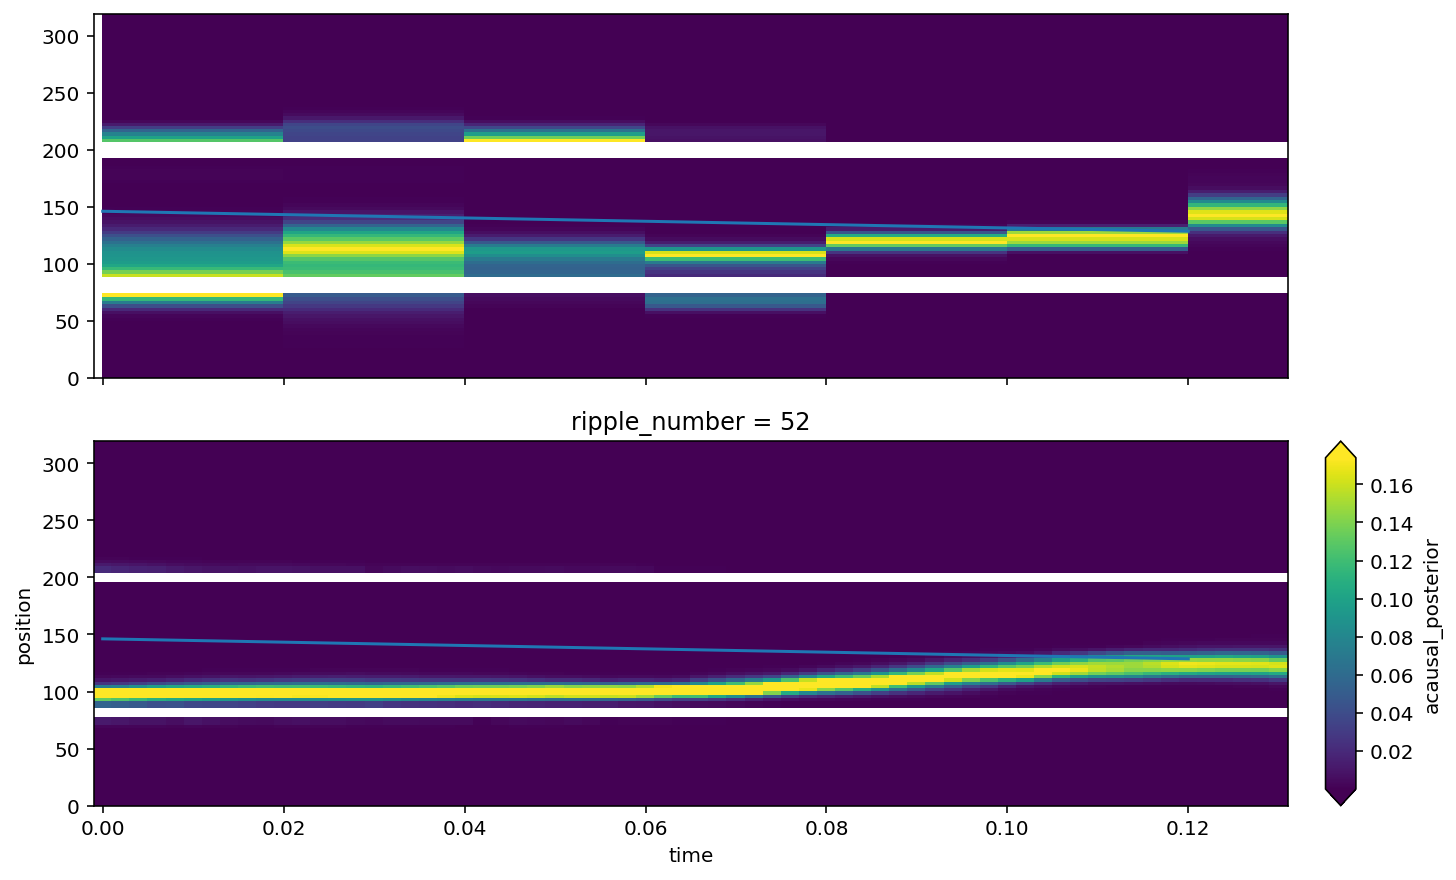

In [54]:
ripple_number = 52

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

dp = np.mean(np.diff(place_bin_edges.squeeze())[is_track_interior])
estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, dt=0.020, dp=dp
)

t = np.append(time, time[-1] + 0.020)
x, y = np.meshgrid(t, place_bin_edges)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
likelihood[:, ~is_track_interior] = np.nan
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state", skipna=False).plot(
    x="time", y="position", robust=True, ax=axes[1]
)
axes[1].plot(time, estimated_position)

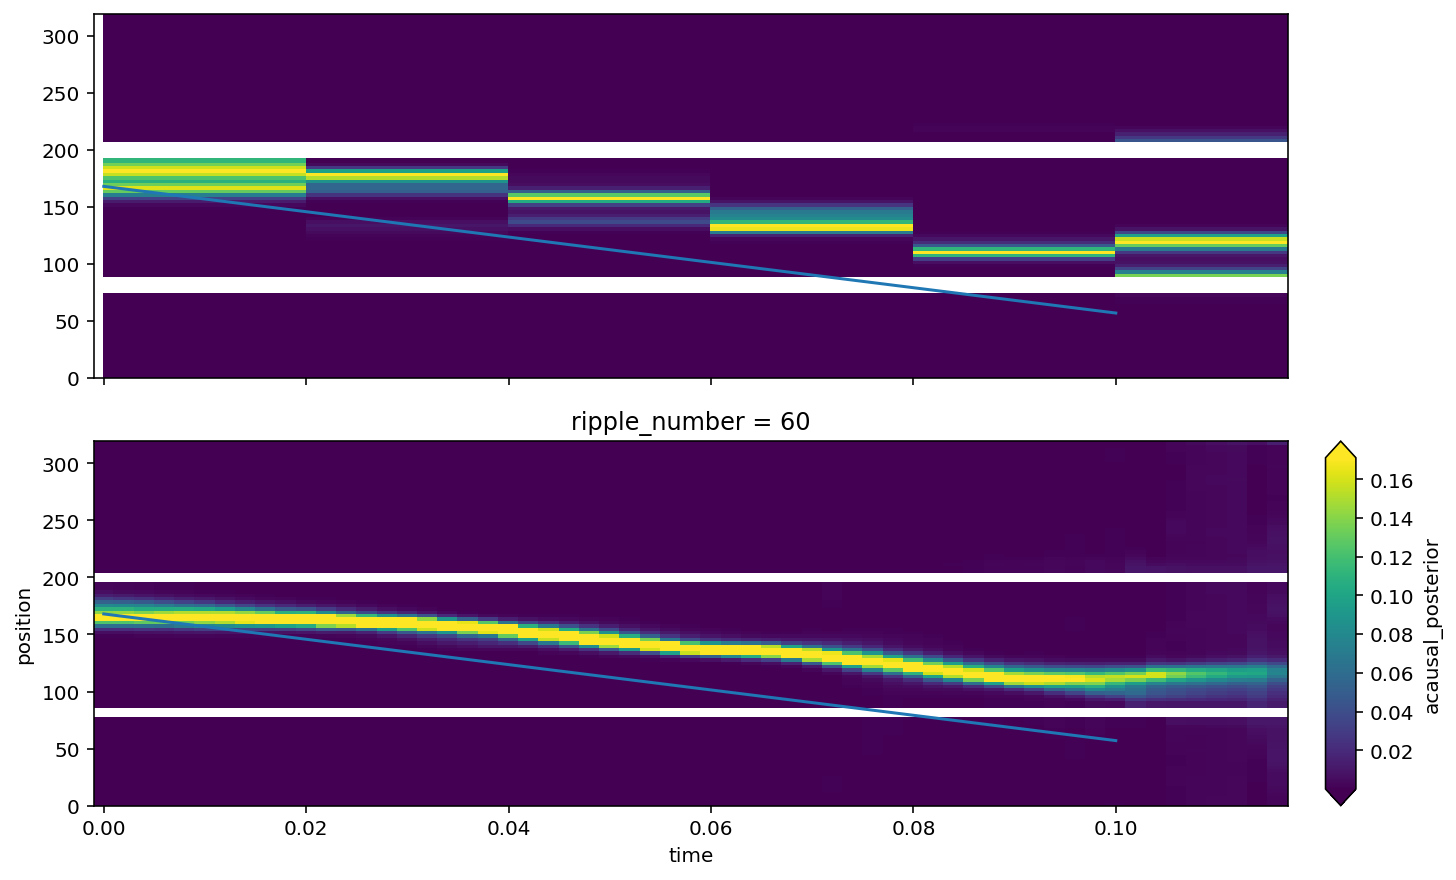

In [55]:
ripple_number = 60

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

dp = np.mean(np.diff(place_bin_edges.squeeze())[is_track_interior])
estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, dt=0.020, dp=dp
)

t = np.append(time, time[-1] + 0.020)
x, y = np.meshgrid(t, place_bin_edges)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
likelihood[:, ~is_track_interior] = np.nan
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state", skipna=False).plot(
    x="time", y="position", robust=True, ax=axes[1]
)
axes[1].plot(time, estimated_position)

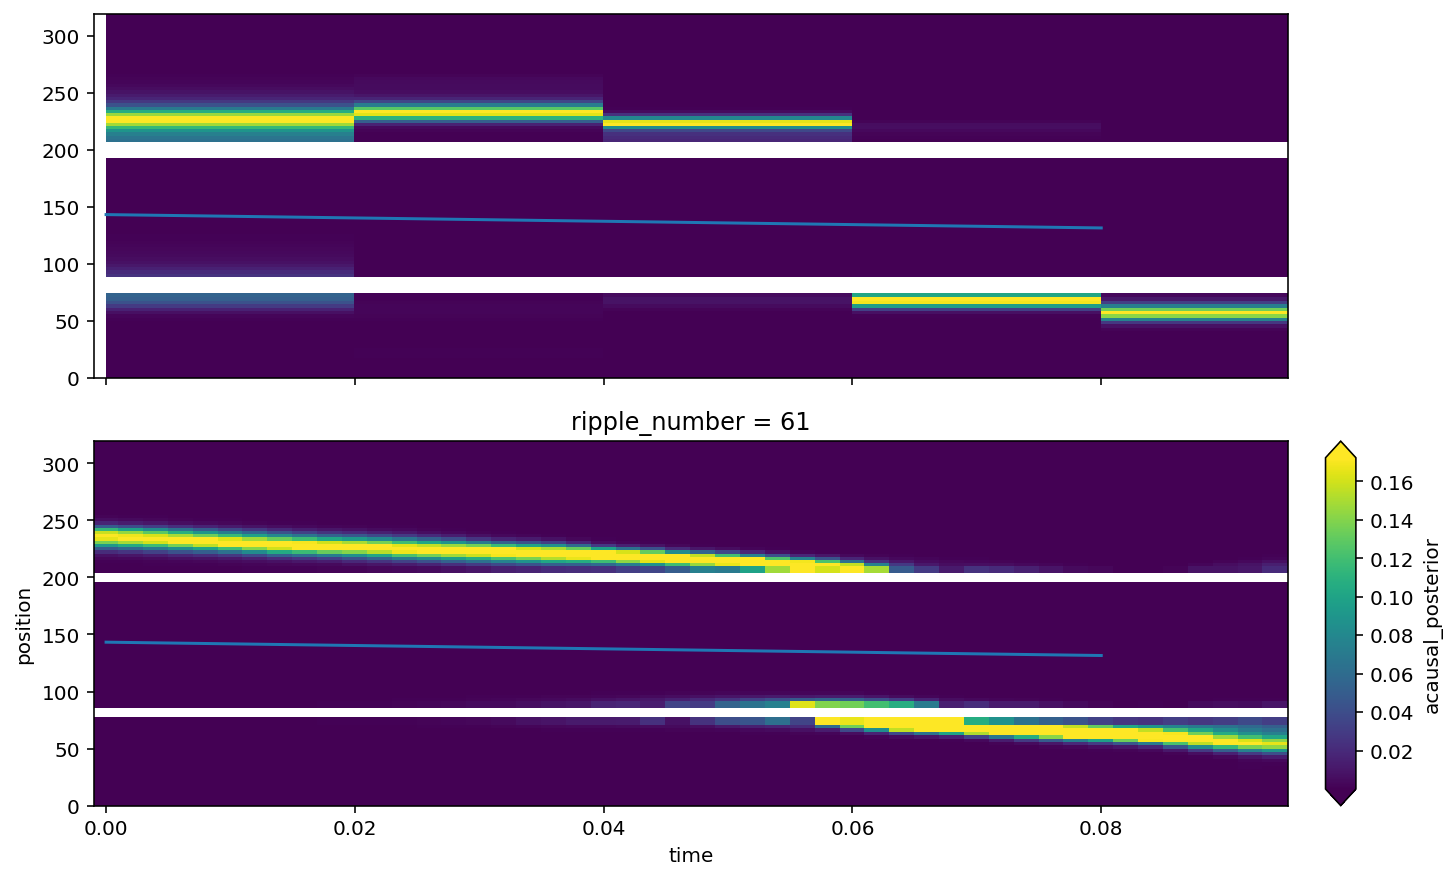

In [56]:
ripple_number = 61

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

dp = np.mean(np.diff(place_bin_edges.squeeze())[is_track_interior])
estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, dt=0.020, dp=dp
)

t = np.append(time, time[-1] + 0.020)
x, y = np.meshgrid(t, place_bin_edges)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
likelihood[:, ~is_track_interior] = np.nan
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state", skipna=False).plot(
    x="time", y="position", robust=True, ax=axes[1]
)
axes[1].plot(time, estimated_position)

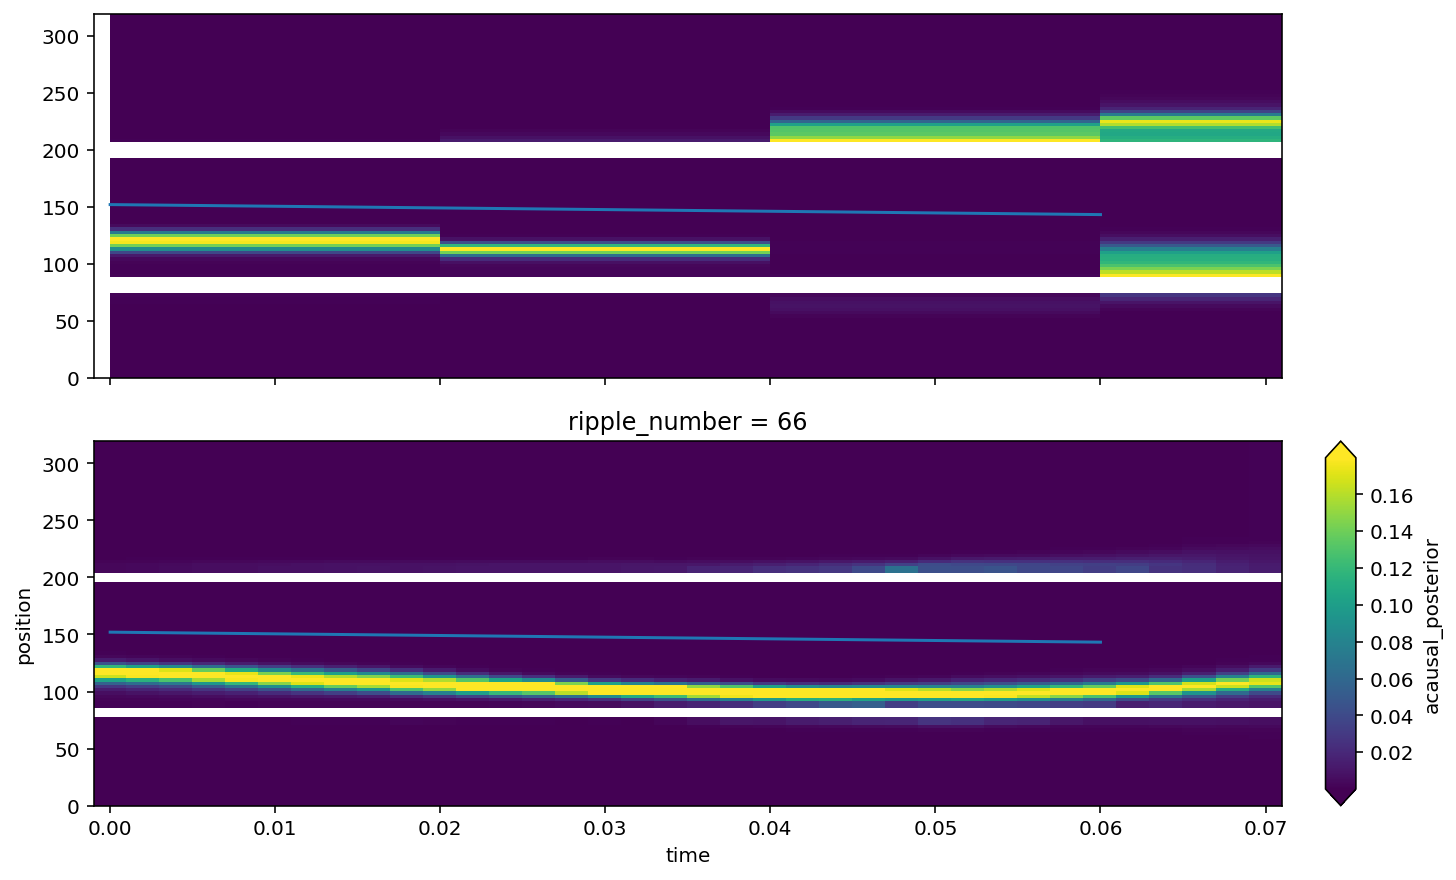

In [57]:
ripple_number = 66

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

dp = np.mean(np.diff(place_bin_edges.squeeze())[is_track_interior])
estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, dt=0.020, dp=dp
)

t = np.append(time, time[-1] + 0.020)
x, y = np.meshgrid(t, place_bin_edges)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
likelihood[:, ~is_track_interior] = np.nan
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state", skipna=False).plot(
    x="time", y="position", robust=True, ax=axes[1]
)
axes[1].plot(time, estimated_position)

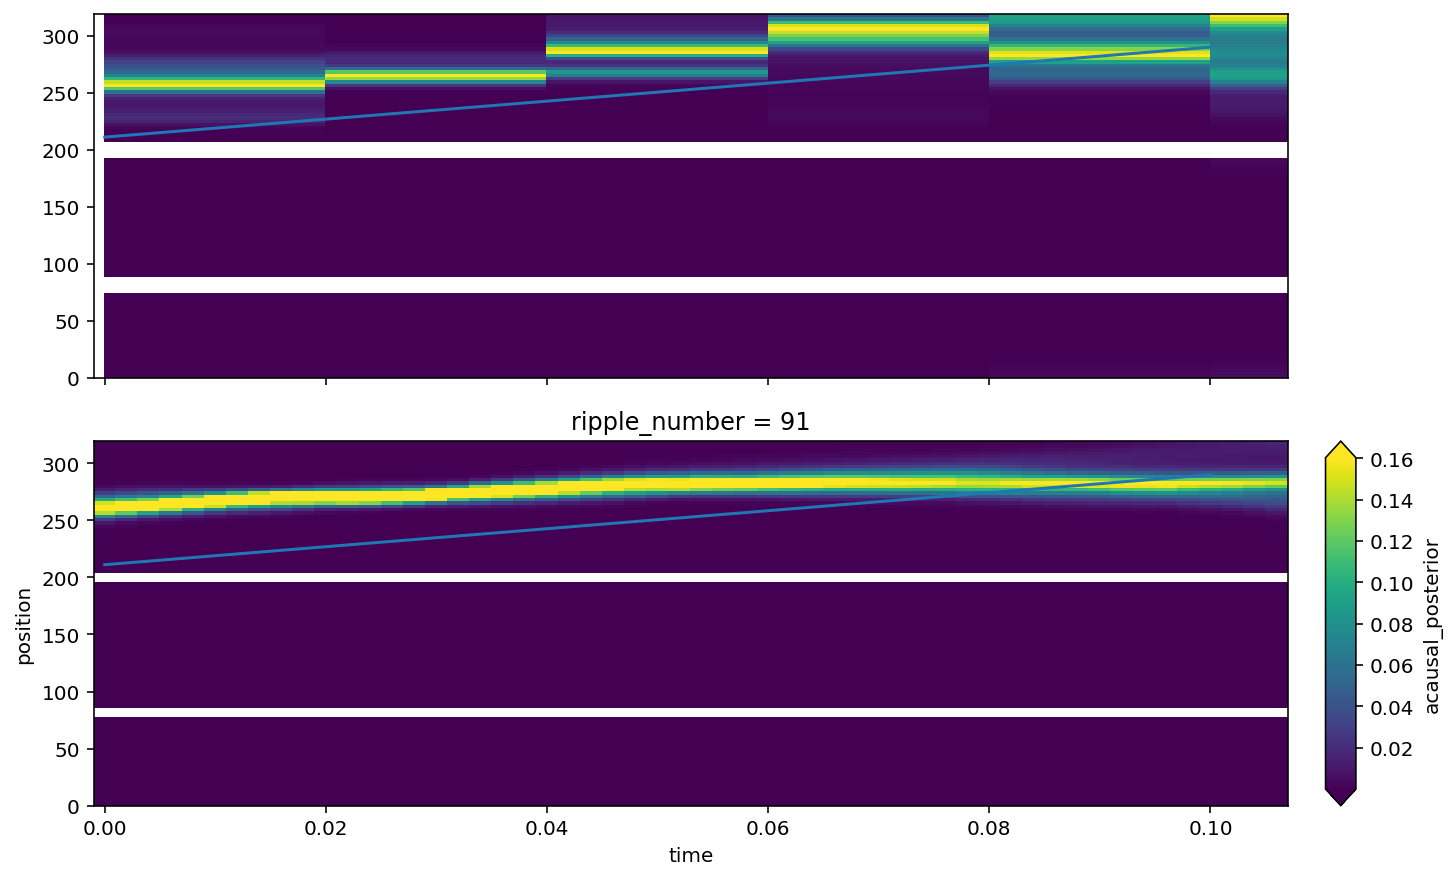

In [58]:
ripple_number = 91

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

dp = np.mean(np.diff(place_bin_edges.squeeze())[is_track_interior])
estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, dt=0.020, dp=dp
)

t = np.append(time, time[-1] + 0.020)
x, y = np.meshgrid(t, place_bin_edges)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
likelihood[:, ~is_track_interior] = np.nan
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state", skipna=False).plot(
    x="time", y="position", robust=True, ax=axes[1]
)
axes[1].plot(time, estimated_position)

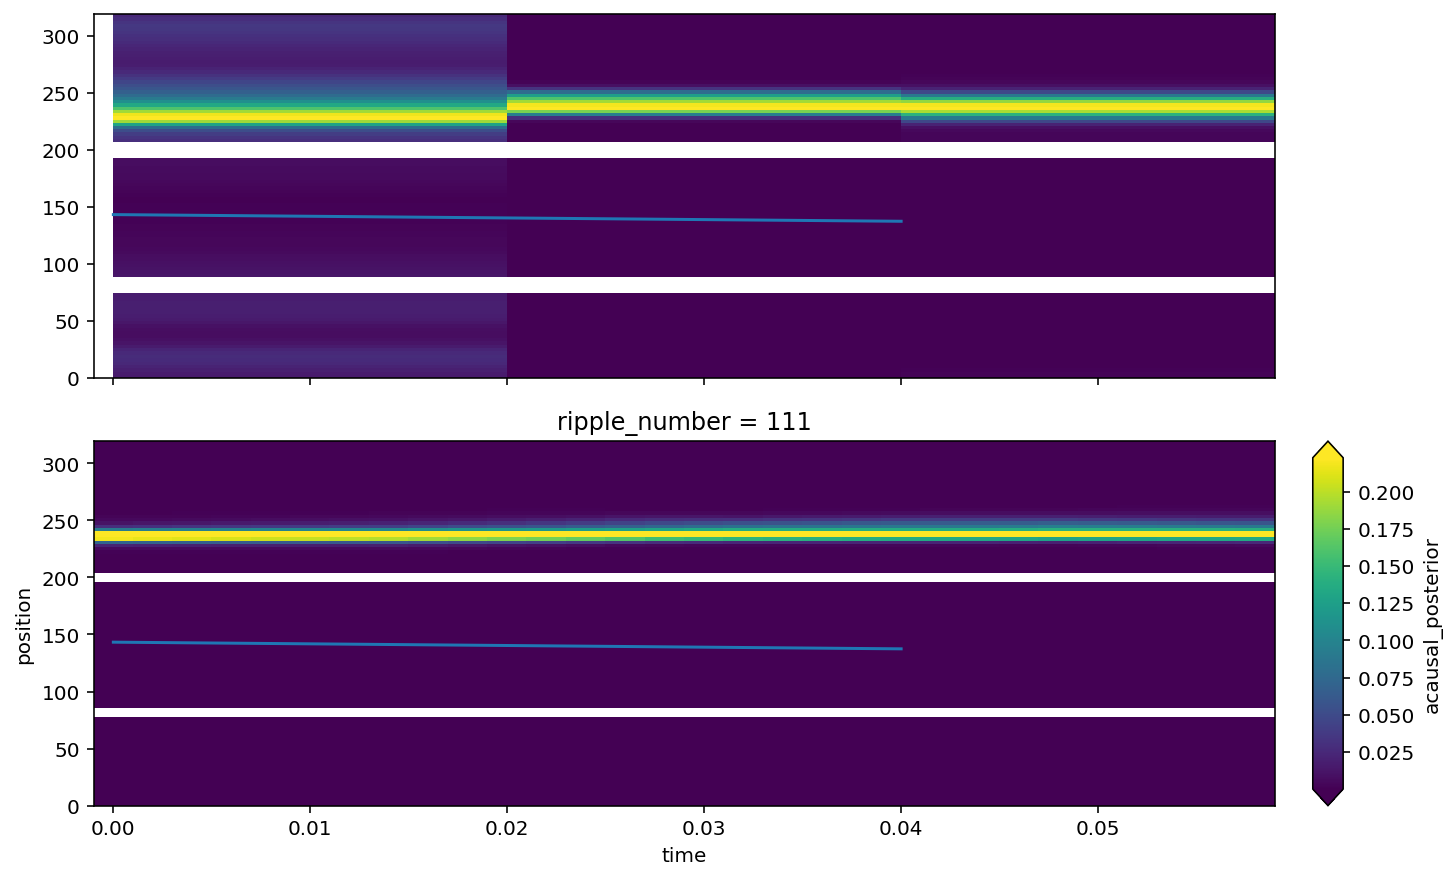

In [59]:
ripple_number = 111

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

dp = np.mean(np.diff(place_bin_edges.squeeze())[is_track_interior])
estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, dt=0.020, dp=dp
)

t = np.append(time, time[-1] + 0.020)
x, y = np.meshgrid(t, place_bin_edges)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
likelihood[:, ~is_track_interior] = np.nan
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state", skipna=False).plot(
    x="time", y="position", robust=True, ax=axes[1]
)
axes[1].plot(time, estimated_position)

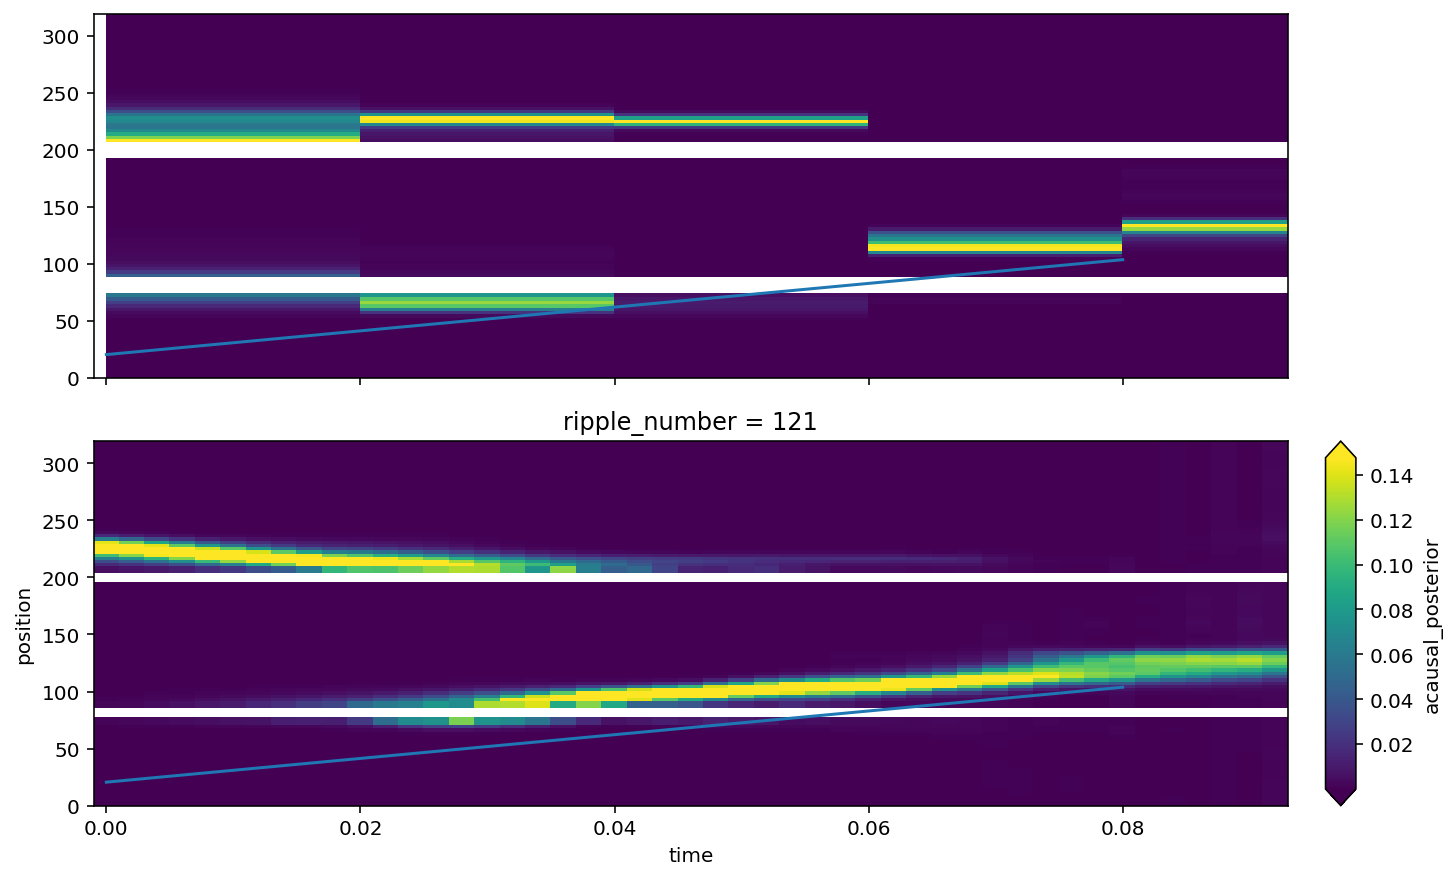

In [60]:
ripple_number = 121

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

dp = np.mean(np.diff(place_bin_edges.squeeze())[is_track_interior])
estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, dt=0.020, dp=dp
)

t = np.append(time, time[-1] + 0.020)
x, y = np.meshgrid(t, place_bin_edges)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
likelihood[:, ~is_track_interior] = np.nan
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state", skipna=False).plot(
    x="time", y="position", robust=True, ax=axes[1]
)
axes[1].plot(time, estimated_position)

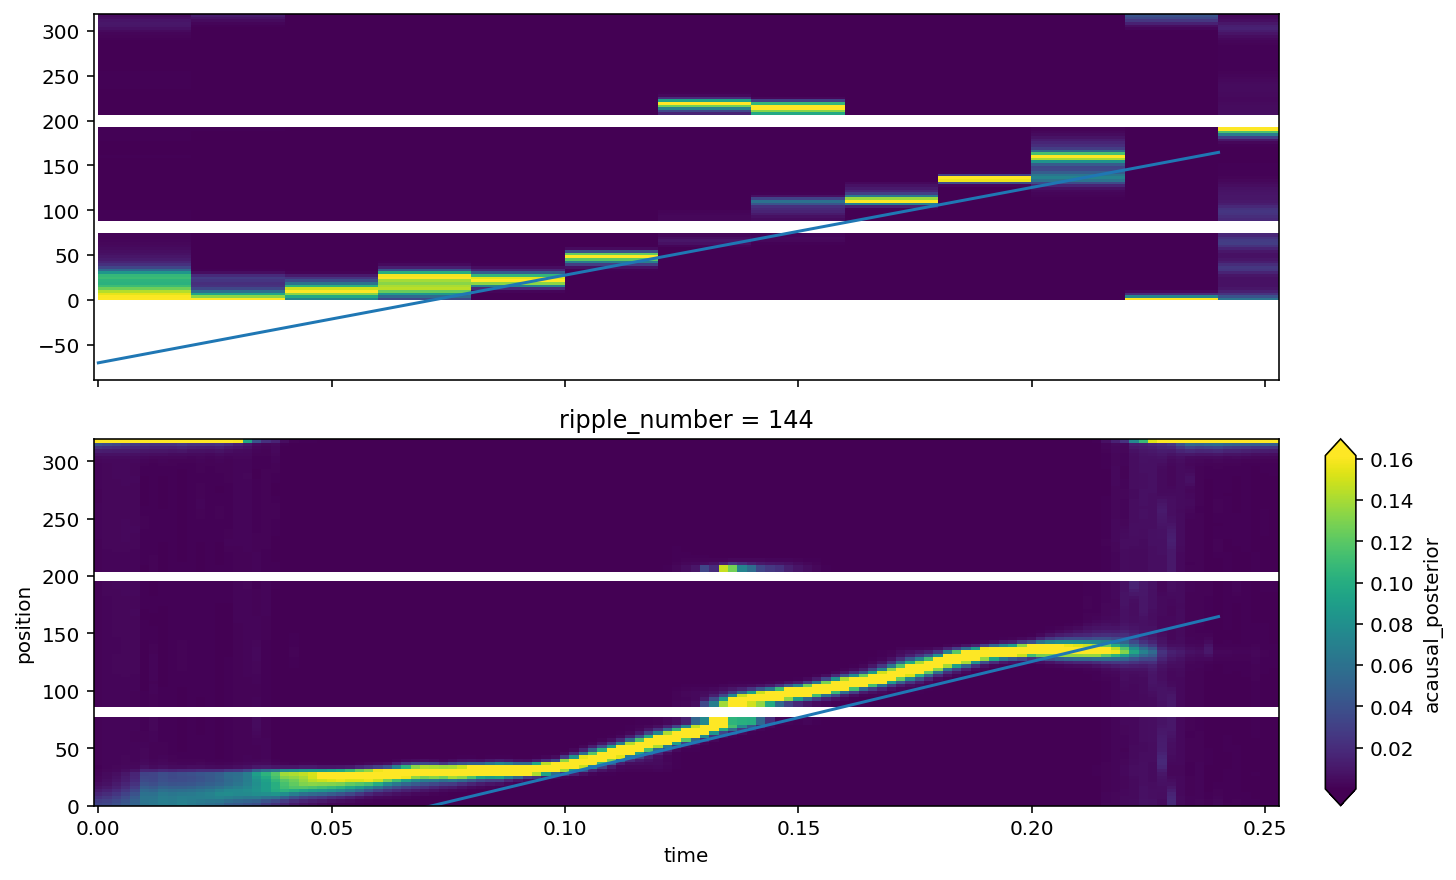

In [61]:
ripple_number = 144

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

dp = np.mean(np.diff(place_bin_edges.squeeze())[is_track_interior])
estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, dt=0.020, dp=dp
)

t = np.append(time, time[-1] + 0.020)
x, y = np.meshgrid(t, place_bin_edges)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
likelihood[:, ~is_track_interior] = np.nan
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state", skipna=False).plot(
    x="time", y="position", robust=True, ax=axes[1]
)
axes[1].plot(time, estimated_position)

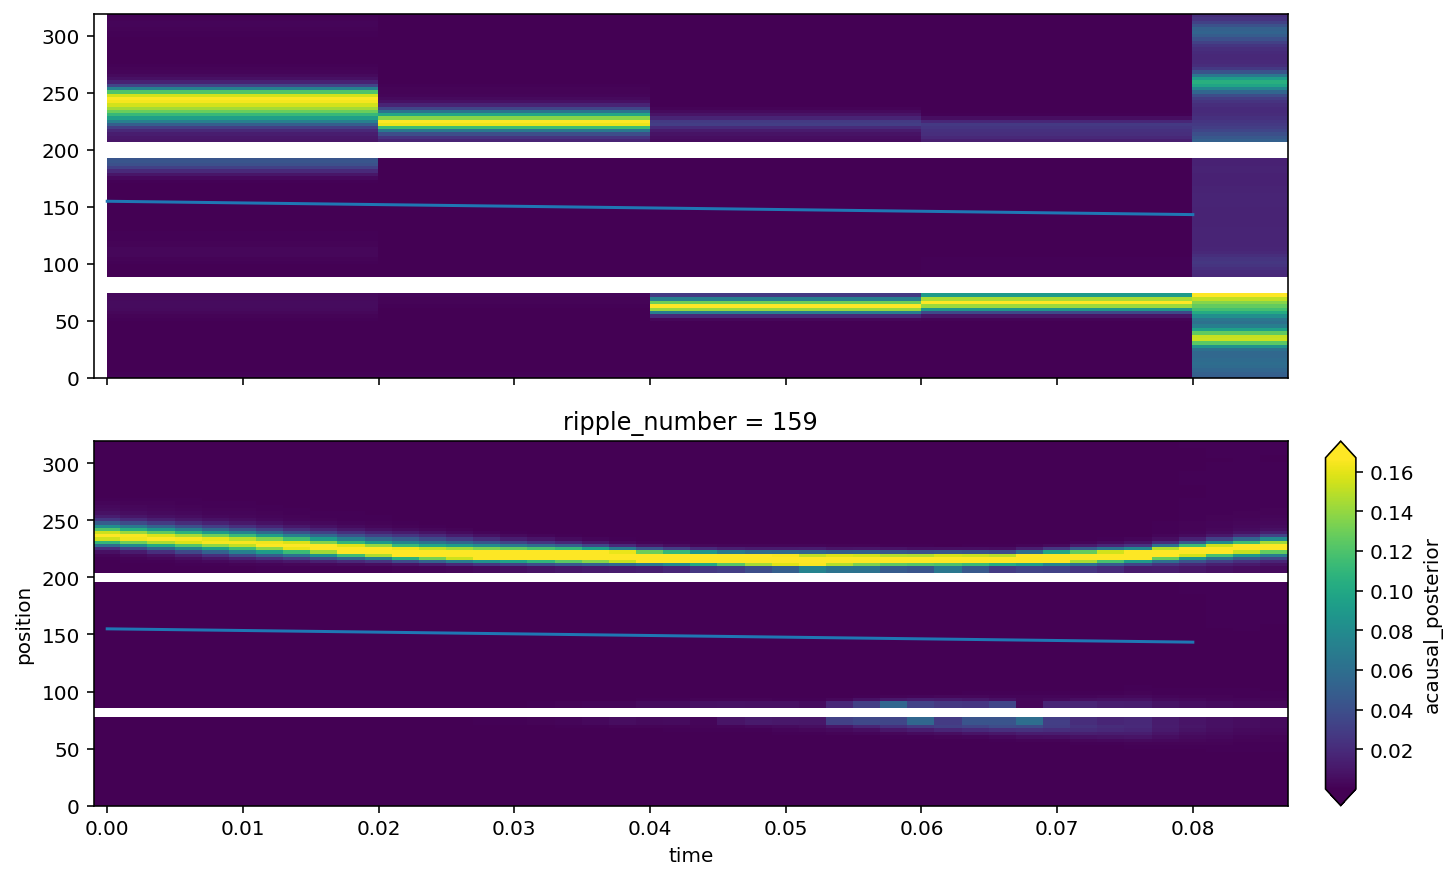

In [62]:
ripple_number = 159

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

dp = np.mean(np.diff(place_bin_edges.squeeze())[is_track_interior])
estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, dt=0.020, dp=dp
)

t = np.append(time, time[-1] + 0.020)
x, y = np.meshgrid(t, place_bin_edges)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
likelihood[:, ~is_track_interior] = np.nan
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state", skipna=False).plot(
    x="time", y="position", robust=True, ax=axes[1]
)
axes[1].plot(time, estimated_position)

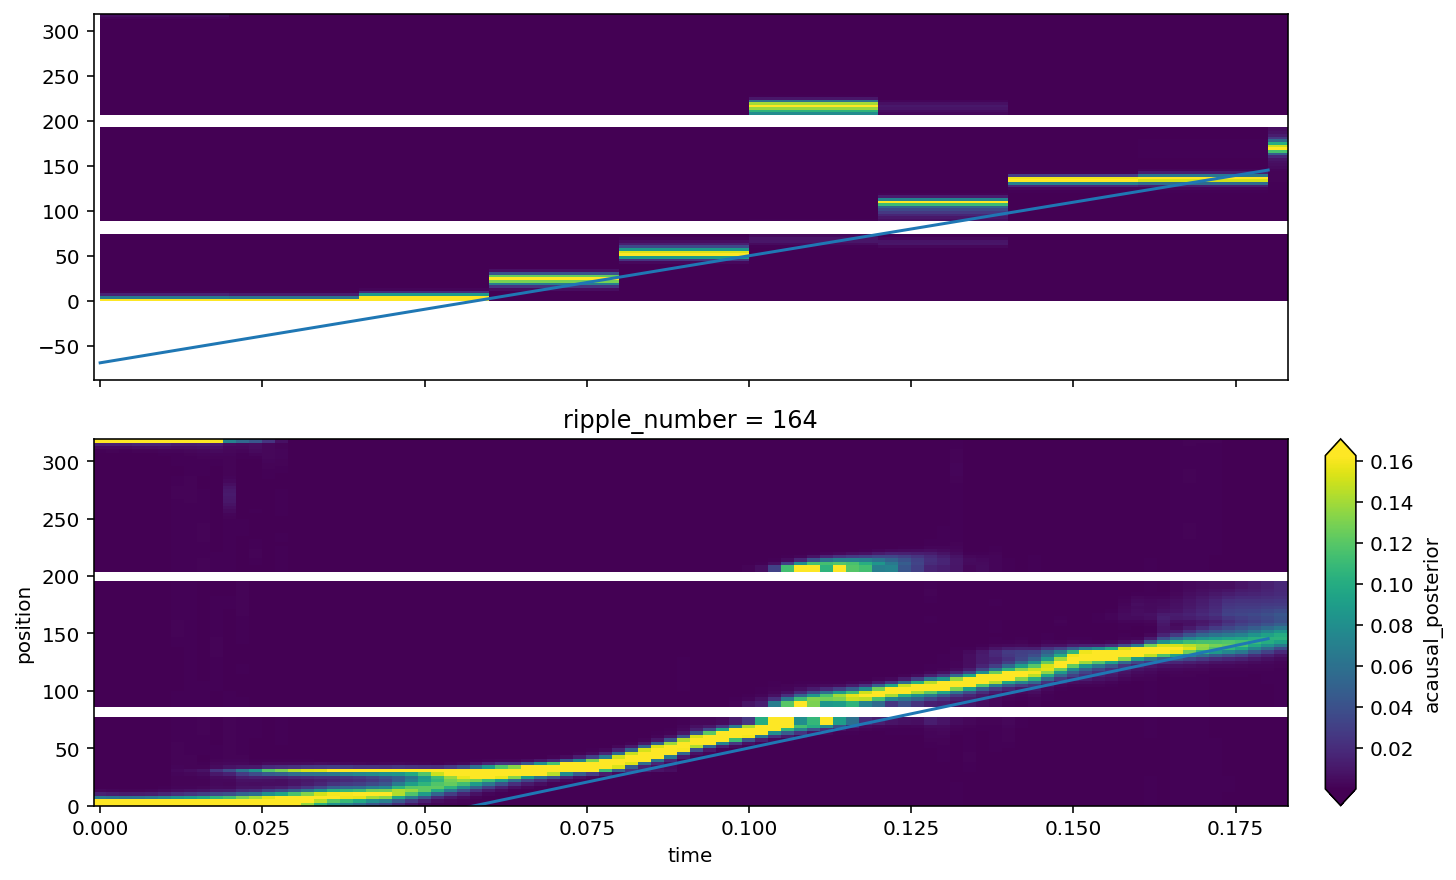

In [63]:
ripple_number = 164

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

dp = np.mean(np.diff(place_bin_edges.squeeze())[is_track_interior])
estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, dt=0.020, dp=dp
)

t = np.append(time, time[-1] + 0.020)
x, y = np.meshgrid(t, place_bin_edges)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
likelihood[:, ~is_track_interior] = np.nan
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state", skipna=False).plot(
    x="time", y="position", robust=True, ax=axes[1]
)
axes[1].plot(time, estimated_position)

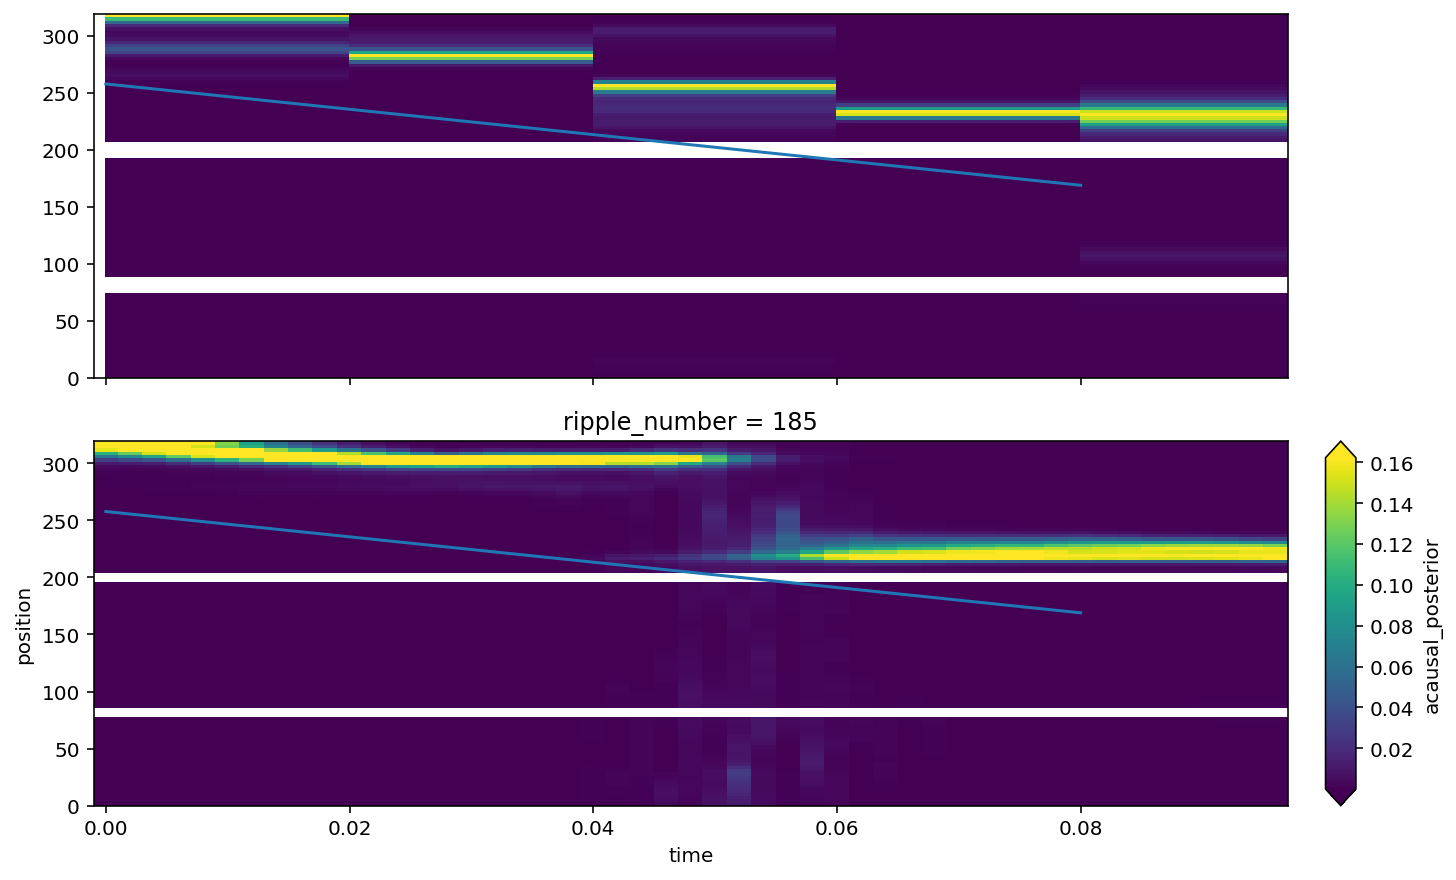

In [64]:
ripple_number = 185

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

dp = np.mean(np.diff(place_bin_edges.squeeze())[is_track_interior])
estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, dt=0.020, dp=dp
)

t = np.append(time, time[-1] + 0.020)
x, y = np.meshgrid(t, place_bin_edges)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
likelihood[:, ~is_track_interior] = np.nan
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state", skipna=False).plot(
    x="time", y="position", robust=True, ax=axes[1]
)
axes[1].plot(time, estimated_position)

ValueError: x and y must have same first dimension, but have shapes (4,) and (5,)

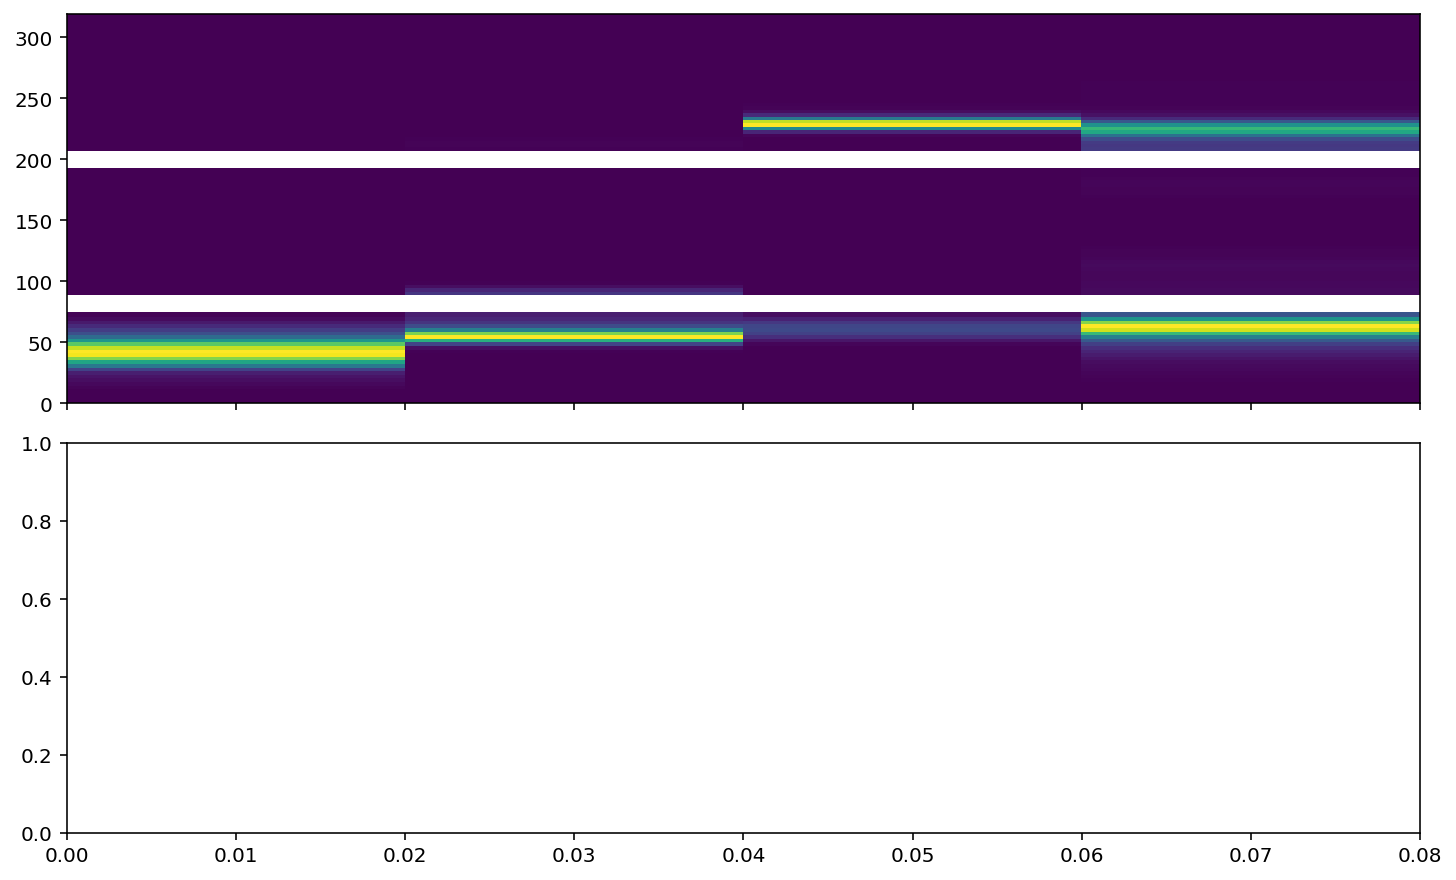

In [66]:
ripple_number = 187

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

dp = np.mean(np.diff(place_bin_edges.squeeze())[is_track_interior])
estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, dt=0.020, dp=dp
)

t = np.append(time, time[-1] + 0.020)
x, y = np.meshgrid(t, place_bin_edges)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
likelihood[:, ~is_track_interior] = np.nan
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state", skipna=False).plot(
    x="time", y="position", robust=True, ax=axes[1]
)
axes[1].plot(t, estimated_position)

In [ ]:
ripple_number = 197

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

dp = np.mean(np.diff(place_bin_edges.squeeze())[is_track_interior])
estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, dt=0.020, dp=dp
)

t = np.append(time, time[-1] + 0.020)
x, y = np.meshgrid(t, place_bin_edges)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
likelihood[:, ~is_track_interior] = np.nan
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state", skipna=False).plot(
    x="time", y="position", robust=True, ax=axes[1]
)
axes[1].plot(time, estimated_position)

In [ ]:
ripple_number = 215

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

dp = np.mean(np.diff(place_bin_edges.squeeze())[is_track_interior])
estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, dt=0.020, dp=dp
)

t = np.append(time, time[-1] + 0.020)
x, y = np.meshgrid(t, place_bin_edges)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
likelihood[:, ~is_track_interior] = np.nan
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state", skipna=False).plot(
    x="time", y="position", robust=True, ax=axes[1]
)
axes[1].plot(time, estimated_position)

In [ ]:
ripple_number = 219

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

dp = np.mean(np.diff(place_bin_edges.squeeze())[is_track_interior])
estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, dt=0.020, dp=dp
)

t = np.append(time, time[-1] + 0.020)
x, y = np.meshgrid(t, place_bin_edges)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
likelihood[:, ~is_track_interior] = np.nan
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state", skipna=False).plot(
    x="time", y="position", robust=True, ax=axes[1]
)
axes[1].plot(time, estimated_position)

In [ ]:
ripple_number = 243

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

dp = np.mean(np.diff(place_bin_edges.squeeze())[is_track_interior])
estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, dt=0.020, dp=dp
)

t = np.append(time, time[-1] + 0.020)
x, y = np.meshgrid(t, place_bin_edges)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
likelihood[:, ~is_track_interior] = np.nan
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state", skipna=False).plot(
    x="time", y="position", robust=True, ax=axes[1]
)
axes[1].plot(time, estimated_position)

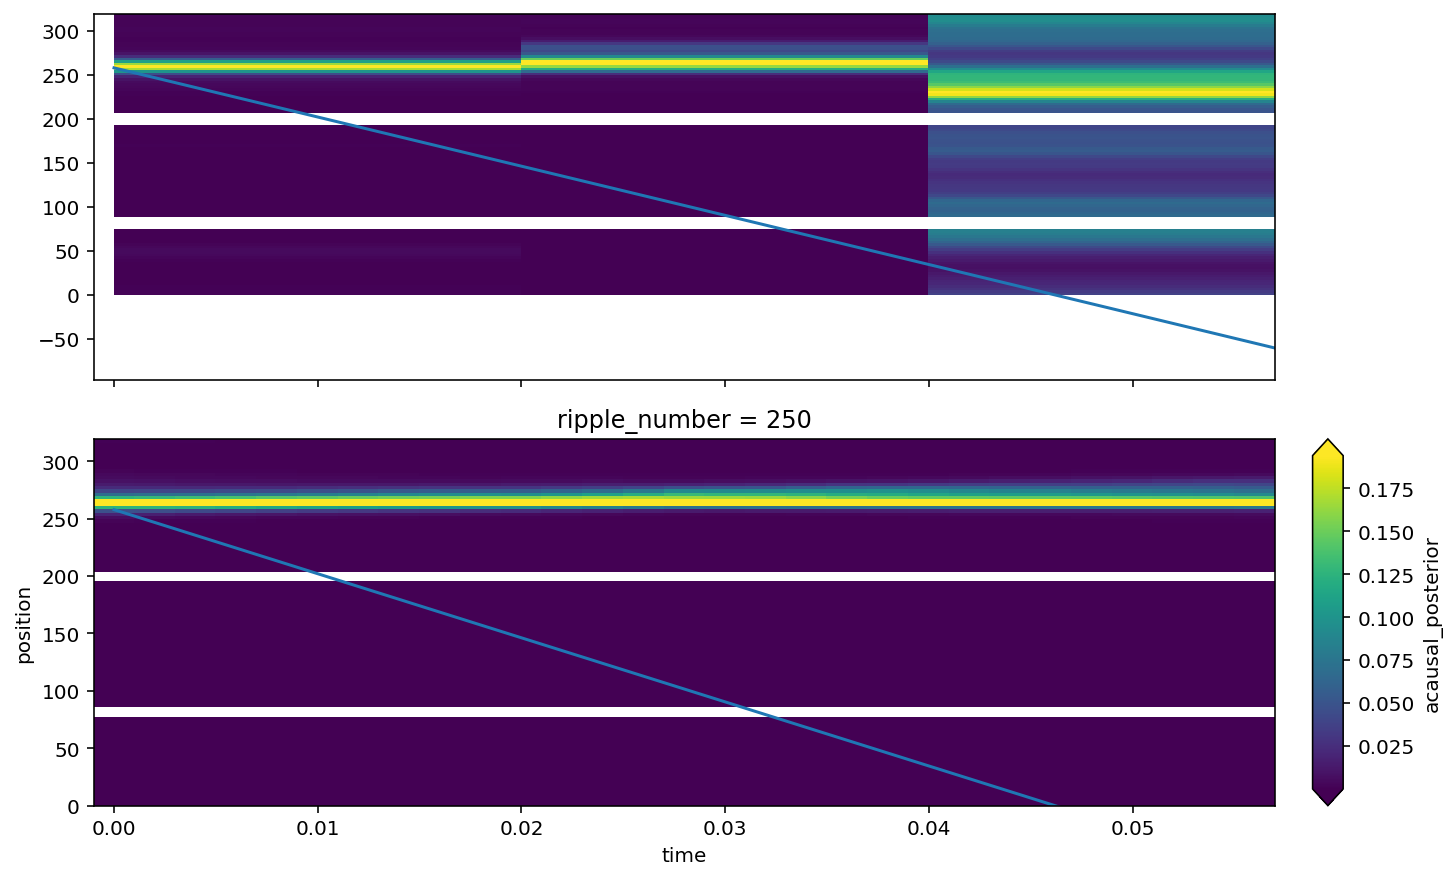

In [183]:
ripple_number = 250

start_time, end_time = (
    ripple_times.loc[ripple_number].start_time / np.timedelta64(1, "s"),
    ripple_times.loc[ripple_number].end_time / np.timedelta64(1, "s"),
)

likelihood, time = predict_mark_likelihood(
    start_time,
    end_time,
    place_bin_centers,
    occupancy,
    joint_pdf_models,
    multiunit_dfs,
    ground_process_intensities,
    mean_rates,
    is_track_interior,
    dt=0.020,
)

dp = np.mean(np.diff(place_bin_edges.squeeze())[is_track_interior])
estimated_velocity, estimated_position, score = detect_line_with_radon(
    likelihood, dt=0.020, dp=dp
)

x, y = np.meshgrid(time, place_bin_edges)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
likelihood[:, ~is_track_interior] = np.nan
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state", skipna=False).plot(
    x="time", y="position", robust=True, ax=axes[1]
)
axes[1].plot(time, estimated_position)

In [185]:
likelihood[np.isnan(likelihood)] = 0.0
likelihood = likelihood / likelihood.sum(axis=1, keepdims=True)

In [221]:
projection_angles = np.arange(-90, 90, 0.5)  # degrees
sinogram = radon(likelihood, theta=projection_angles, circle=False, preserve_range=True)
center_pixel = np.asarray((likelihood.shape[0] // 2, likelihood.shape[1] // 2))

pixels_from_center = np.arange(-sinogram.shape[0] // 2, sinogram.shape[0] // 2)

n_pixels_from_center_ind, projection_angle_ind = np.unravel_index(
    indices=np.nanargmax(sinogram), shape=sinogram.shape
)
projection_angle = projection_angles[projection_angle_ind]
n_pixels_from_center = pixels_from_center[n_pixels_from_center_ind]

In [213]:
import pandas as pd

pd.DataFrame(likelihood).to_csv("likelihood.csv")

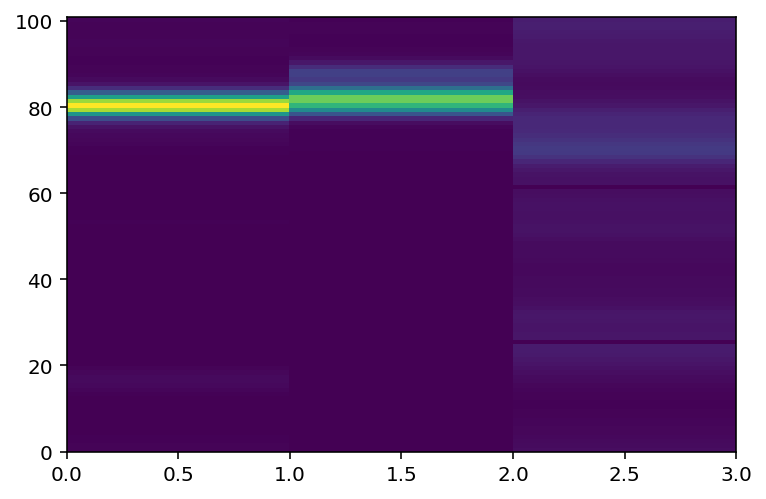

In [208]:
plt.pcolormesh(likelihood.T)

In [222]:
sinogram.shape

(143, 360)

In [225]:
projection_angles[]

array([-90. , -89.5, -89. , -88.5, -88. , -87.5, -87. , -86.5, -86. ,
       -85.5, -85. , -84.5, -84. , -83.5, -83. , -82.5, -82. , -81.5,
       -81. , -80.5, -80. , -79.5, -79. , -78.5, -78. , -77.5, -77. ,
       -76.5, -76. , -75.5, -75. , -74.5, -74. , -73.5, -73. , -72.5,
       -72. , -71.5, -71. , -70.5, -70. , -69.5, -69. , -68.5, -68. ,
       -67.5, -67. , -66.5, -66. , -65.5, -65. , -64.5, -64. , -63.5,
       -63. , -62.5, -62. , -61.5, -61. , -60.5, -60. , -59.5, -59. ,
       -58.5, -58. , -57.5, -57. , -56.5, -56. , -55.5, -55. , -54.5,
       -54. , -53.5, -53. , -52.5, -52. , -51.5, -51. , -50.5, -50. ,
       -49.5, -49. , -48.5, -48. , -47.5, -47. , -46.5, -46. , -45.5,
       -45. , -44.5, -44. , -43.5, -43. , -42.5, -42. , -41.5, -41. ,
       -40.5, -40. , -39.5, -39. , -38.5, -38. , -37.5, -37. , -36.5,
       -36. , -35.5, -35. , -34.5, -34. , -33.5, -33. , -32.5, -32. ,
       -31.5, -31. , -30.5, -30. , -29.5, -29. , -28.5, -28. , -27.5,
       -27. , -26.5,

In [203]:
projection_angle, n_pixels_from_center

(-88.5, 0)

In [206]:
n_pixels_from_center_ind, projection_angle_ind

(72, 3)

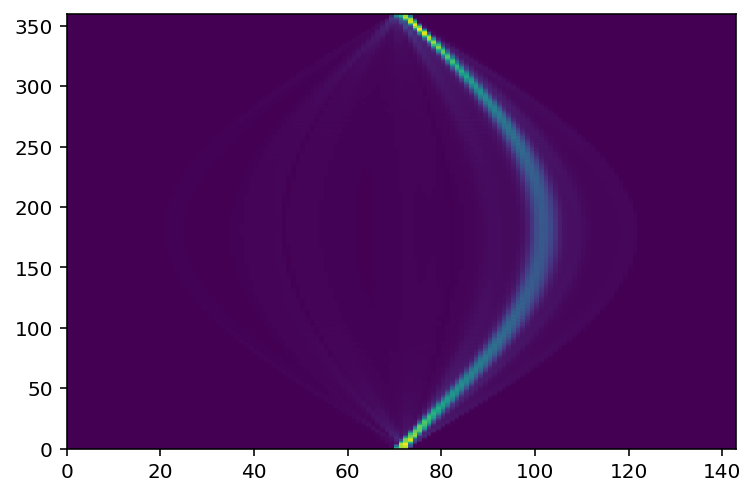

In [223]:
plt.pcolormesh(sinogram.T)

In [171]:
from skimage.transform import radon
import numpy as np

projection_angles = np.arange(-90, 90, 0.5)  # degrees
sinogram = radon(
    likelihood.T, theta=projection_angles, circle=False, preserve_range=True
)

center_pixel = np.asarray((likelihood.shape[0] // 2, likelihood.shape[1] // 2))

pixels_from_center = np.arange(-sinogram.shape[0] // 2, sinogram.shape[0] // 2)

n_pixels_from_center_ind, projection_angle_ind = np.unravel_index(
    indices=np.nanargmax(sinogram), shape=sinogram.shape
)

projection_angle = projection_angles[projection_angle_ind]
n_pixels_from_center = pixels_from_center[n_pixels_from_center_ind]

projection_angle_radians = np.deg2rad(projection_angle)
estimated_velocity = np.tan(projection_angle_radians) * dp / dt

time_ind = np.arange(likelihood.shape[0] + 1)


estimated_position = center_pixel[1] + (
    (
        n_pixels_from_center
        - (time_ind - center_pixel[0]) * np.cos(projection_angle_radians)
    )
    / np.sin(projection_angle_radians)
)
estimated_position *= dp

n_position_bins = likelihood.shape[1]
score = np.nanmax(sinogram) / n_position_bins

array([1.73313437e-07, 1.78213585e-07])

In [125]:
estimated_velocity

0.0

In [134]:
time_ind - center_pixel[0]

array([-1,  0,  1,  2])

In [128]:
np.cos(projection_angle_radians) / np.sin(projection_angle_radians)

inf

In [133]:
from scipy.special import cotdg

1 / cotdg(projection_angle)

0.0

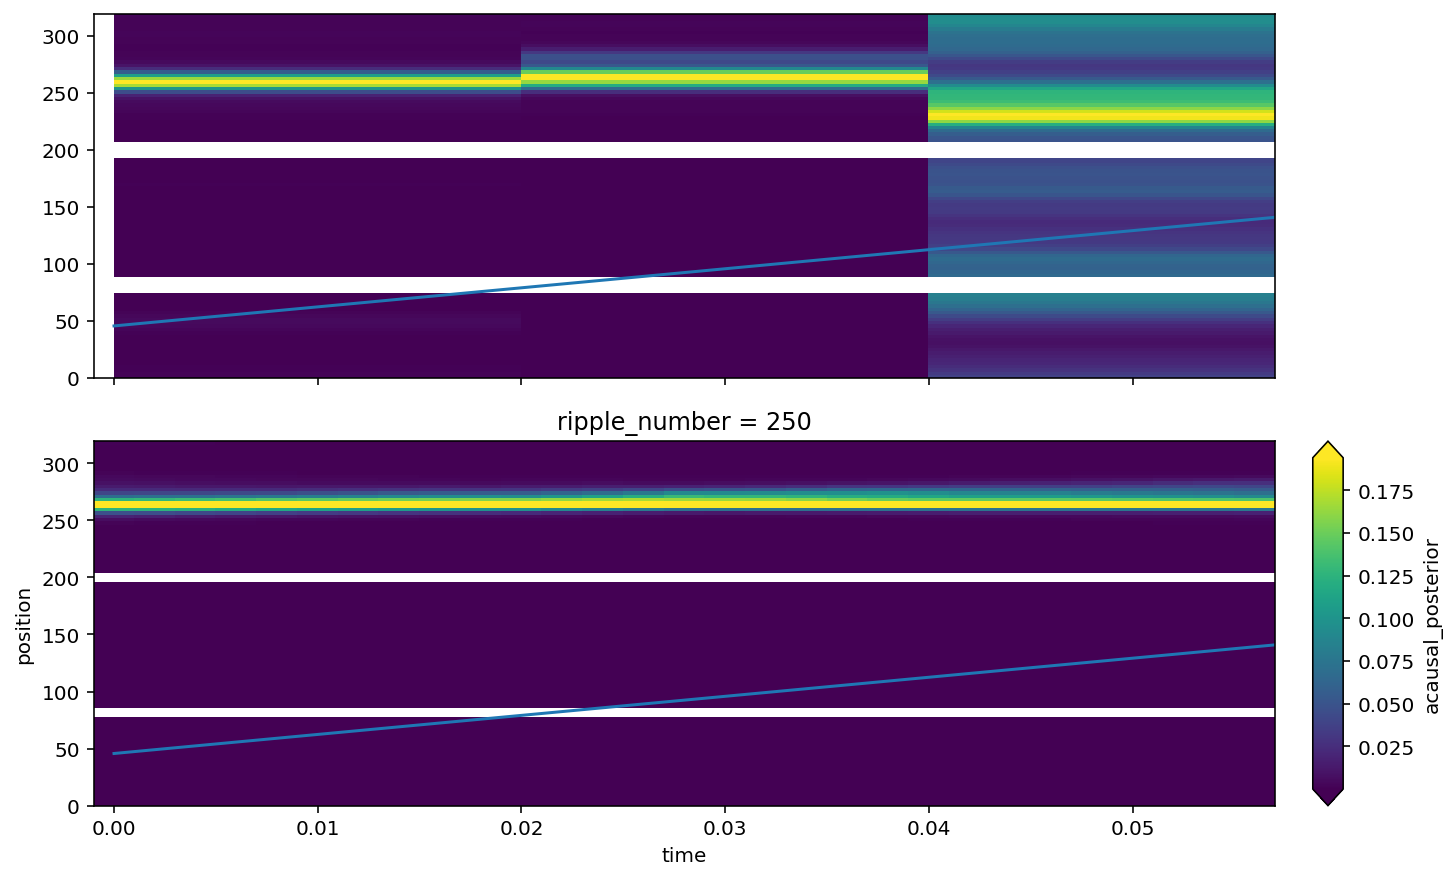

In [172]:
x, y = np.meshgrid(time, place_bin_edges)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6), sharex=True)
likelihood[:, ~is_track_interior] = np.nan
axes[0].pcolormesh(x, y, likelihood.T)
axes[0].plot(time, estimated_position)

posterior = (
    results.acausal_posterior.sel(ripple_number=ripple_number)
    .dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
posterior.sum("state", skipna=False).plot(
    x="time", y="position", robust=True, ax=axes[1]
)
axes[1].plot(time, estimated_position)

In [226]:
dp

2.9233954058825447

In [227]:
(likelihood.shape[0] // 2, likelihood.shape[1] // 2)

(1, 50)

In [174]:
likelihood[np.isnan(likelihood)] = 0.0

In [175]:
likelihood.shape

(3, 101)

In [179]:
likelihood / likelihood.sum(axis=1, keepdims=True)

array([1., 1., 1.])

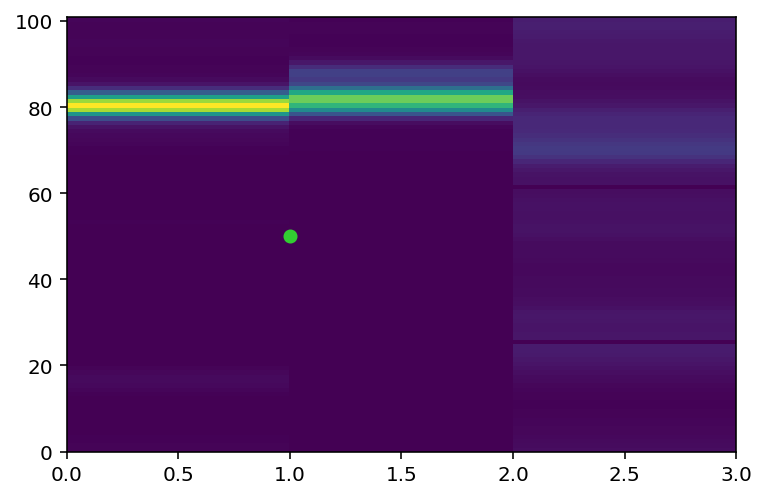

In [239]:
blah = center_pixel + np.asarray(
    [
        n_pixels_from_center * np.cos(projection_angle_radians),
        n_pixels_from_center * np.sin(projection_angle_radians),
    ]
)

plt.pcolormesh(likelihood.T)
plt.scatter(center_pixel[0], center_pixel[1], color="limegreen")
# plt.scatter(blah[0], blah[1], color="red")

In [253]:
n_pixels_from_center_ind, projection_angle_ind

(72, 3)

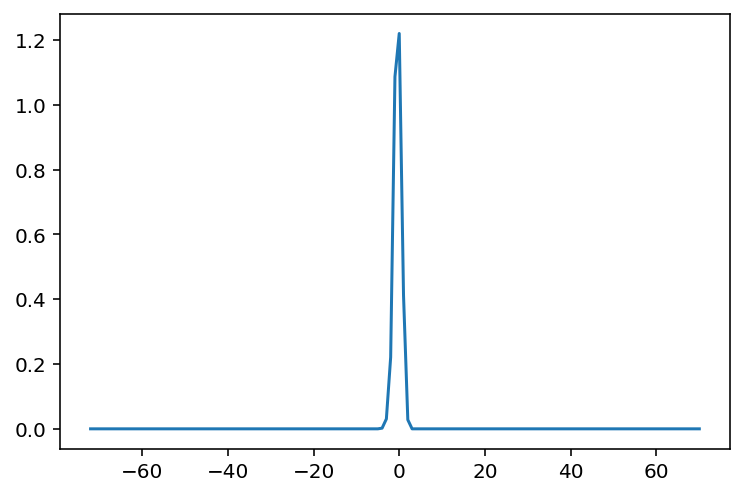

In [255]:
plt.plot(pixels_from_center, sinogram[:, projection_angle_ind])

In [254]:
center_pixel

array([ 1, 50])

In [2]:
# likelihood_dummy = np.zeros_like(likelihood)
# likelihood_dummy[:, 30] = 1.0
likelihood_dummy = np.zeros_like(likelihood)

starting_position = 0.0
velocity = 2000
true_replay_position = starting_position + velocity * time[:-1]

p_ind = np.digitize(true_replay_position, place_bin_edges.squeeze()[1:-1])
t_ind = np.arange(len(time) - 1)
likelihood_dummy[(t_ind, p_ind)] = 1.0


projection_angles = np.arange(-90, 90, 0.5)  # degrees
sinogram = radon(
    likelihood_dummy, theta=projection_angles, circle=False, preserve_range=True
)

center_pixel = np.asarray(
    (likelihood_dummy.shape[0] // 2, likelihood_dummy.shape[1] // 2)
)

pixels_from_center = np.arange((-sinogram.shape[0] // 2) + 1, sinogram.shape[0] // 2)

n_pixels_from_center_ind, projection_angle_ind = np.unravel_index(
    indices=np.nanargmax(sinogram), shape=sinogram.shape
)

projection_angle = projection_angles[projection_angle_ind]
n_pixels_from_center = pixels_from_center[n_pixels_from_center_ind]

projection_angle_radians = np.deg2rad(projection_angle)
estimated_velocity = np.tan(projection_angle_radians) * dp / dt


if ~np.isclose(projection_angle_radians, -np.pi / 2):
    denom = np.sin(np.pi / 2 + projection_angle_radians)
else:
    denom = 1

estimated_position = center_pixel[1] + (
    (
        n_pixels_from_center
        - (time_ind - center_pixel[0]) * np.cos(np.pi / 2 + projection_angle_radians)
    )
    / denom
)

plt.pcolormesh(x, y, likelihood_dummy.T)
plt.plot(time, estimated_position)
plt.plot(time[:-1], true_replay_position)

NameError: name 'np' is not defined

In [1]:
likelihood

NameError: name 'likelihood' is not defined

In [317]:
if ~np.isclose(projection_angle_radians, -np.pi / 2):
    denom = np.sin(np.pi / 2 + projection_angle_radians)
else:
    denom = 1

estimated_position = center_pixel[1] + (
    (
        n_pixels_from_center
        - (time_ind - center_pixel[0]) * np.cos(np.pi / 2 + projection_angle_radians)
    )
    / denom
)
estimated_position

array([-0.22714893,  6.88822079, 14.00359052, 21.11896024])

In [311]:
projection_angle_radians = np.deg2rad(projection_angle)
estimated_velocity = np.tan(projection_angle_radians) * dp / dt

blah = center_pixel + np.asarray(
    [
        n_pixels_from_center * np.cos(projection_angle_radians),
        n_pixels_from_center * np.sin(projection_angle_radians),
    ]
)
estimated_velocity

1040.0519578786875

In [312]:
blah

array([ 0.16496139, 44.05839159])

In [294]:
n_pixels_from_center_ind, projection_angle_ind

(121, 180)

In [295]:
n_pixels_from_center, projection_angle

(50, 0.0)

In [287]:
pixels_from_center[0]

-72